In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)

In [2]:
nba_df = pd.read_csv('..//data//nba_df.csv')

In [3]:
nba_df.head()

,Player,Pos,Age,Tm,G,GS,MP_x,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MP_y,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,,OWS,DWS,WS,WS/48,.1,OBPM,DBPM,BPM,VORP,Season_x,Players,Season_y,NBA_ALL_TEAM,Season_end
0,Kareem Abdul-Jabbar,C,41,LAL,74,74,22.9,4.2,8.9,0.475,0.0,0.0,0.000,4.2,8.9,0.477,0.475,1.6,2.2,0.739,1.4,3.1,4.5,1.0,0.5,1.1,1.3,2.6,10.1,1695,12.9,0.511,0.005,0.250,7.3,14.2,11.0,6.1,1.1,2.9,11.5,20.1,NaN,0.9,2.0,2.9,0.082,NaN,-1.9,-0.2,-2.1,0.0,1989,NaN,NaN,NaN,NaN
1,Mark Acres,C,26,BOS,62,0,10.2,0.9,1.8,0.482,0.0,0.0,1.000,0.9,1.8,0.478,0.487,0.4,0.8,0.542,1.0,1.4,2.4,0.3,0.3,0.1,0.4,1.5,2.2,632,8.2,0.507,0.009,0.421,10.9,15.6,13.3,3.7,1.5,0.6,14.5,10.4,NaN,0.4,0.5,0.9,0.066,NaN,-3.0,-0.4,-3.4,-0.2,1989,NaN,NaN,NaN,NaN
2,Michael Adams,PG,26,DEN,77,77,36.2,6.1,14.1,0.433,2.2,6.1,0.356,3.9,8.0,0.490,0.509,4.2,5.1,0.819,0.9,2.8,3.7,6.4,2.2,0.1,2.3,1.9,18.5,2787,17.5,0.567,0.431,0.363,2.5,8.3,5.2,22.2,2.7,0.2,12.5,19.7,NaN,5.4,2.9,8.3,0.143,NaN,2.7,0.2,2.9,3.4,1989,NaN,NaN,NaN,NaN
3,Mark Aguirre,SF,29,TOT,80,76,32.5,7.3,15.9,0.461,0.6,2.2,0.293,6.7,13.7,0.488,0.481,3.6,4.9,0.733,1.8,3.0,4.8,3.5,0.6,0.5,2.6,2.9,18.9,2597,16.4,0.524,0.137,0.309,6.4,10.0,8.3,17.9,0.9,0.8,12.6,27.4,NaN,2.4,2.1,4.5,0.082,NaN,1.4,-1.3,0.1,1.4,1989,NaN,NaN,NaN,NaN
4,Mark Aguirre,SF,29,DAL,44,44,34.8,8.5,18.8,0.450,0.7,2.3,0.293,7.8,16.6,0.471,0.467,4.0,5.5,0.730,2.0,3.3,5.3,4.3,0.7,0.7,3.2,2.9,21.7,1529,17.3,0.509,0.119,0.294,6.6,10.3,8.5,21.5,0.9,1.1,13.0,30.5,NaN,0.7,1.0,1.7,0.052,NaN,1.5,-1.9,-0.4,0.6,1989,NaN,NaN,NaN,NaN


In [4]:
nba_df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP_x', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'MP_y',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', ' ', 'OWS', 'DWS', 'WS', 'WS/48', ' .1', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'Season_x', 'Players', 'Season_y',
       'NBA_ALL_TEAM', 'Season_end'],
      dtype='object')

In [5]:
nba_df = nba_df.rename(columns = {'MP_y': 'MP'})

Exploration of amount of players that were on All nba team

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

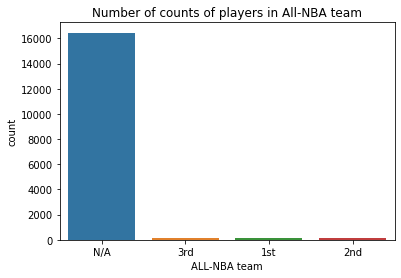

In [7]:
# Fill missing values
nba_df['NBA_ALL_TEAM'] = nba_df['NBA_ALL_TEAM'].fillna('M')

sns_plot = sns.countplot(x = 'NBA_ALL_TEAM', data = nba_df)
plt.xlabel('ALL-NBA team')
plt.xticks(np.arange(4), ('N/A','3rd','1st','2nd'))
plt.title('Number of counts of players in All-NBA team')

plt.show()

Data is heavily skewed towards non-winners. As there are only 15 All-NBA receipients (first, second, third teams) per year, it makes sense.

We will do some data explorations to determine the cut off of win shares and minutes played

In [8]:
nba_df['NBA_ALL_TEAM'].unique()

array(['M', '1st', '2nd', '3rd'], dtype=object)

In [9]:
def nba_plot(data = nba_df, column = 'WS'):
    g = sns.FacetGrid(data = nba_df, hue = "NBA_ALL_TEAM", height = 10, aspect = 1.8)
    g = g.map(sns.kdeplot, column, shade = True).add_legend()

    if column == 'WS':
        plt.xlabel('Win Shares', fontsize = 30)
        plt.ylabel('Distribution Density', fontsize = 30)
        plt.title('NBA players Win Shares', fontsize = 30)
    
    elif column == 'MP':
        plt.xlabel('Total Minutes', fontsize = 30)
        plt.ylabel('Distribution Density', fontsize = 30)
        plt.title('NBA players Total Minutes Played', fontsize = 30)

    g._legend.set_title("All-NBA Team")

    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)

    labels = ['Non-winner', '3rd Team', '1st Team', '2nd Team']
    for t, l in zip(g._legend.texts, labels): t.set_text(l)
        

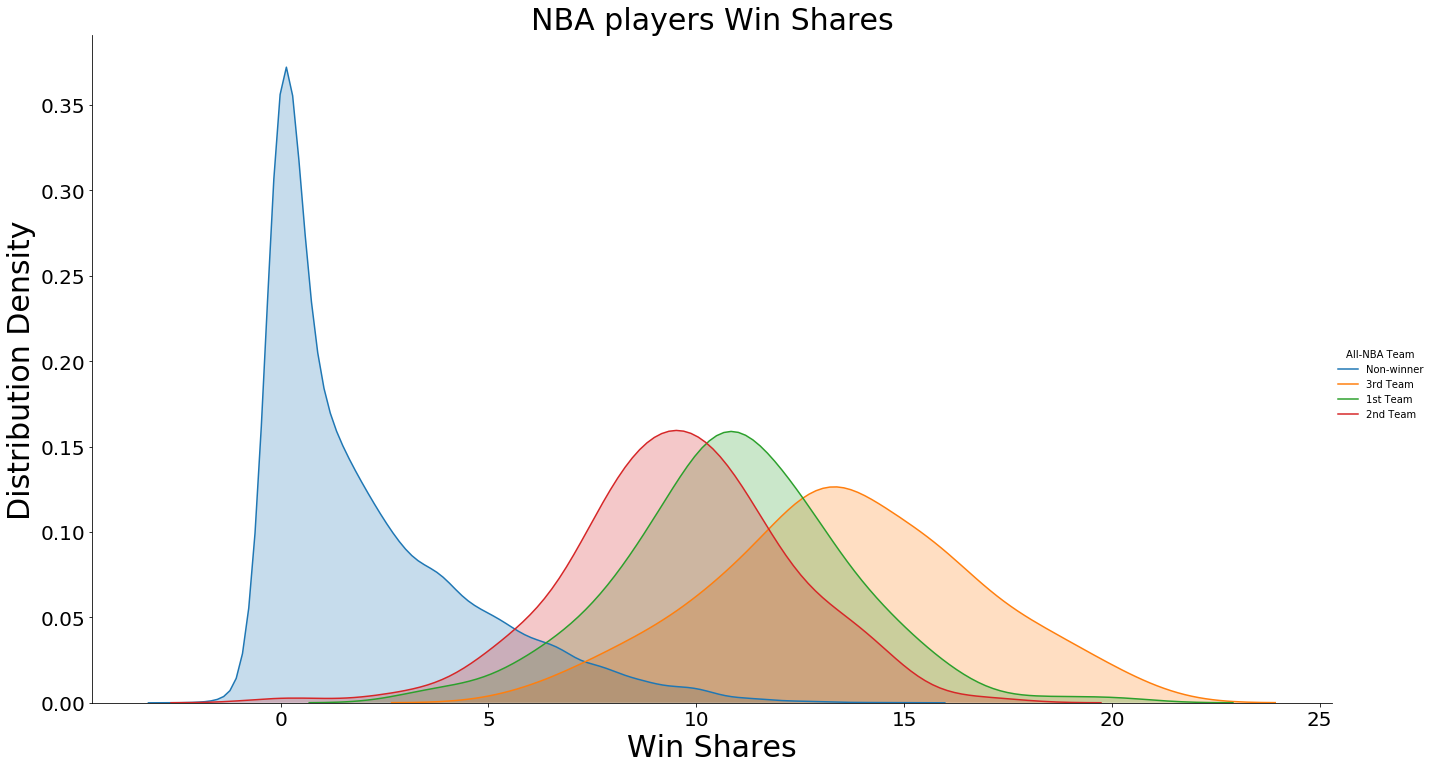

In [10]:
nba_plot(column = 'WS')

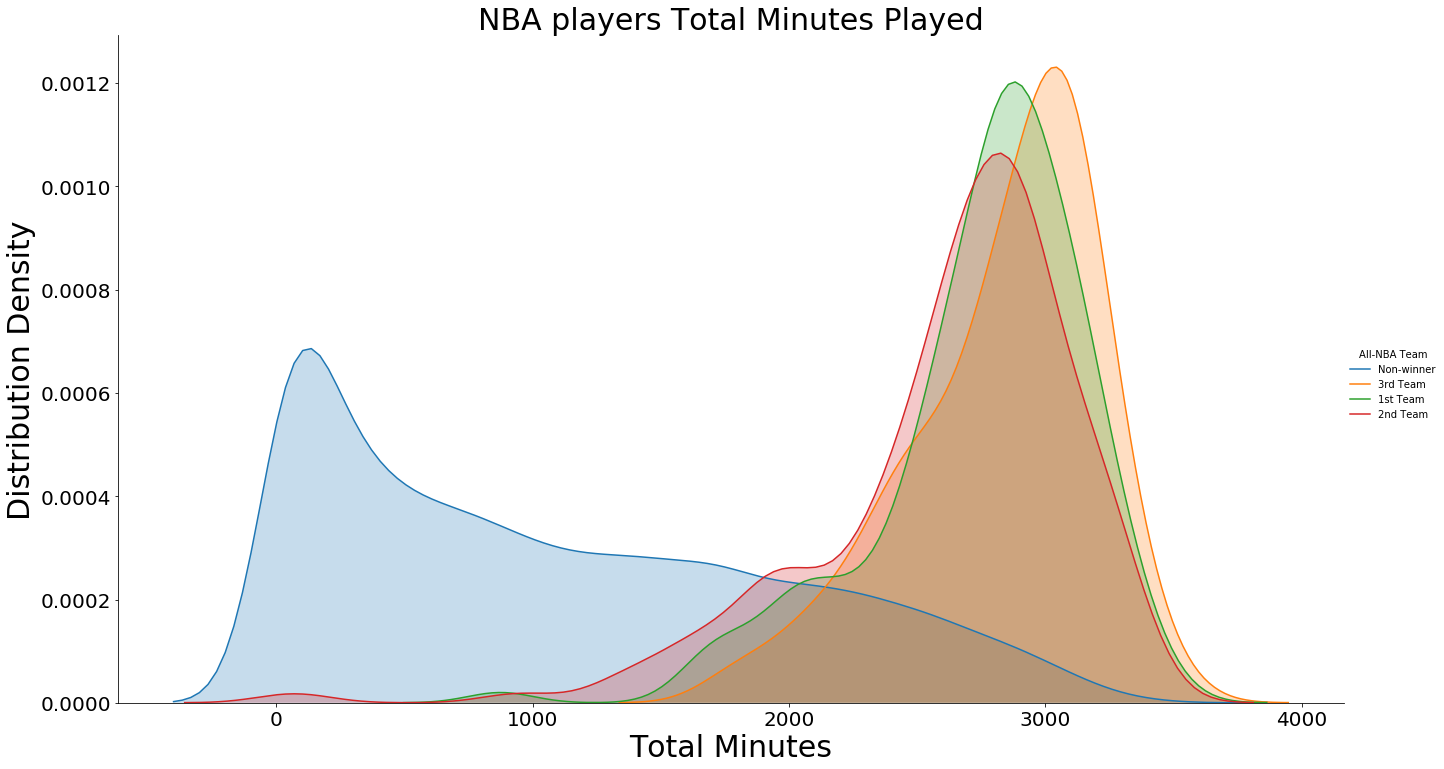

In [11]:
nba_plot(column = 'MP')

Set a cutoff:
- Win Shares > 4.5
- Total Minutes Played >= 1500 minutes

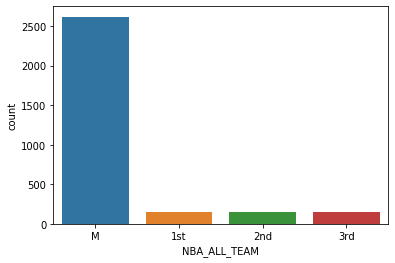

In [12]:
sns.countplot(x = 'NBA_ALL_TEAM', data = nba_df[nba_df['WS'] > 4.5])

In [13]:
nba_df.head(1)

,Player,Pos,Age,Tm,G,GS,MP_x,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,,OWS,DWS,WS,WS/48,.1,OBPM,DBPM,BPM,VORP,Season_x,Players,Season_y,NBA_ALL_TEAM,Season_end
0,Kareem Abdul-Jabbar,C,41,LAL,74,74,22.9,4.2,8.9,0.475,0.0,0.0,0.0,4.2,8.9,0.477,0.475,1.6,2.2,0.739,1.4,3.1,4.5,1.0,0.5,1.1,1.3,2.6,10.1,1695,12.9,0.511,0.005,0.25,7.3,14.2,11.0,6.1,1.1,2.9,11.5,20.1,NaN,0.9,2.0,2.9,0.082,NaN,-1.9,-0.2,-2.1,0.0,1989,NaN,NaN,M,NaN


In [14]:
nba_df.head(5)

,Player,Pos,Age,Tm,G,GS,MP_x,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,,OWS,DWS,WS,WS/48,.1,OBPM,DBPM,BPM,VORP,Season_x,Players,Season_y,NBA_ALL_TEAM,Season_end
0,Kareem Abdul-Jabbar,C,41,LAL,74,74,22.9,4.2,8.9,0.475,0.0,0.0,0.000,4.2,8.9,0.477,0.475,1.6,2.2,0.739,1.4,3.1,4.5,1.0,0.5,1.1,1.3,2.6,10.1,1695,12.9,0.511,0.005,0.250,7.3,14.2,11.0,6.1,1.1,2.9,11.5,20.1,NaN,0.9,2.0,2.9,0.082,NaN,-1.9,-0.2,-2.1,0.0,1989,NaN,NaN,M,NaN
1,Mark Acres,C,26,BOS,62,0,10.2,0.9,1.8,0.482,0.0,0.0,1.000,0.9,1.8,0.478,0.487,0.4,0.8,0.542,1.0,1.4,2.4,0.3,0.3,0.1,0.4,1.5,2.2,632,8.2,0.507,0.009,0.421,10.9,15.6,13.3,3.7,1.5,0.6,14.5,10.4,NaN,0.4,0.5,0.9,0.066,NaN,-3.0,-0.4,-3.4,-0.2,1989,NaN,NaN,M,NaN
2,Michael Adams,PG,26,DEN,77,77,36.2,6.1,14.1,0.433,2.2,6.1,0.356,3.9,8.0,0.490,0.509,4.2,5.1,0.819,0.9,2.8,3.7,6.4,2.2,0.1,2.3,1.9,18.5,2787,17.5,0.567,0.431,0.363,2.5,8.3,5.2,22.2,2.7,0.2,12.5,19.7,NaN,5.4,2.9,8.3,0.143,NaN,2.7,0.2,2.9,3.4,1989,NaN,NaN,M,NaN
3,Mark Aguirre,SF,29,TOT,80,76,32.5,7.3,15.9,0.461,0.6,2.2,0.293,6.7,13.7,0.488,0.481,3.6,4.9,0.733,1.8,3.0,4.8,3.5,0.6,0.5,2.6,2.9,18.9,2597,16.4,0.524,0.137,0.309,6.4,10.0,8.3,17.9,0.9,0.8,12.6,27.4,NaN,2.4,2.1,4.5,0.082,NaN,1.4,-1.3,0.1,1.4,1989,NaN,NaN,M,NaN
4,Mark Aguirre,SF,29,DAL,44,44,34.8,8.5,18.8,0.450,0.7,2.3,0.293,7.8,16.6,0.471,0.467,4.0,5.5,0.730,2.0,3.3,5.3,4.3,0.7,0.7,3.2,2.9,21.7,1529,17.3,0.509,0.119,0.294,6.6,10.3,8.5,21.5,0.9,1.1,13.0,30.5,NaN,0.7,1.0,1.7,0.052,NaN,1.5,-1.9,-0.4,0.6,1989,NaN,NaN,M,NaN


In [17]:
nba_df[nba_df['NBA_ALL_TEAM'] == '3rd']

,Player,Pos,Age,Tm,G,GS,MP_x,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,,OWS,DWS,WS,WS/48,.1,OBPM,DBPM,BPM,VORP,Season_x,Players,Season_y,NBA_ALL_TEAM,Season_end
74,Terry Cummings,SF,27,MIL,80,78,35.3,9.1,19.5,0.467,0.1,0.2,0.467,9.0,19.4,0.467,0.469,4.5,5.8,0.787,3.5,4.6,8.1,2.5,1.3,0.9,2.5,3.3,22.9,2824,19.7,0.518,0.010,0.294,11.3,15.3,13.3,11.7,1.8,1.6,10.2,28.9,NaN,4.2,3.5,7.7,0.131,NaN,2.0,-0.8,1.2,2.3,1989,Terry Cummings,1988–89,3rd,1989.0
105,Dale Ellis,SG,28,SEA,82,82,38.9,10.5,20.9,0.501,2.0,4.1,0.478,8.5,16.7,0.507,0.549,4.6,5.6,0.816,1.9,2.3,4.2,2.0,1.3,0.3,2.7,2.4,27.5,3190,19.7,0.589,0.198,0.270,5.3,6.7,6.0,8.1,1.6,0.4,10.2,26.6,NaN,9.2,1.6,10.8,0.163,NaN,4.3,-1.6,2.7,3.8,1989,Dale Ellis,1988–89,3rd,1989.0
276,Robert Parish,C,35,BOS,80,80,35.5,7.5,13.1,0.570,0.0,0.0,NaN,7.5,13.1,0.570,0.570,3.7,5.1,0.719,4.3,8.2,12.5,2.2,1.0,1.5,2.5,2.6,18.6,2840,21.6,0.607,0.000,0.391,14.0,26.1,20.1,9.1,1.4,2.4,14.0,20.9,NaN,6.9,3.6,10.5,0.177,NaN,3.5,-0.2,3.3,3.8,1989,Robert Parish,1988–89,3rd,1989.0
299,Mark Price,PG,24,CLE,75,74,36.4,7.1,13.4,0.526,1.2,2.8,0.441,5.8,10.6,0.548,0.572,3.5,3.9,0.901,0.6,2.4,3.0,8.4,1.5,0.1,2.8,1.3,18.9,2728,20.6,0.623,0.210,0.290,2.1,7.0,4.7,33.8,2.1,0.1,15.7,21.0,NaN,8.0,3.3,11.3,0.199,NaN,4.5,0.0,4.5,4.5,1989,Mark Price,1988–89,3rd,1989.0
414,Dominique Wilkins,SF,29,ATL,80,80,37.5,10.2,22.0,0.464,0.4,1.3,0.276,9.8,20.6,0.475,0.472,5.5,6.6,0.844,3.2,3.7,6.9,2.6,1.5,0.7,2.3,1.7,26.2,2997,21.8,0.528,0.060,0.298,9.2,11.0,10.0,11.9,1.9,1.0,8.4,29.4,NaN,7.5,2.9,10.4,0.166,NaN,4.5,-1.1,3.4,4.1,1989,Dominique Wilkins,1988–89,3rd,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,Rudy Gobert,C,26,UTA,81,80,31.8,5.9,8.8,0.669,0.0,0.0,NaN,5.9,8.8,0.669,0.669,4.1,6.4,0.636,3.8,9.0,12.9,2.0,0.8,2.3,1.6,2.9,15.9,2577,24.6,0.682,0.000,0.733,13.2,30.2,21.9,9.6,1.2,5.8,12.1,17.8,NaN,8.7,5.7,14.4,0.268,NaN,3.0,2.5,5.4,4.8,2019,Rudy Gobert,2018–19,3rd,2019.0
16480,Blake Griffin,PF,29,DET,75,75,35.0,8.3,17.9,0.462,2.5,7.0,0.362,5.7,10.9,0.525,0.532,5.5,7.3,0.753,1.3,6.2,7.5,5.4,0.7,0.4,3.4,2.7,24.5,2622,21.0,0.581,0.389,0.410,4.0,20.1,11.8,27.1,1.0,0.9,13.8,30.2,NaN,5.1,2.9,8.0,0.147,NaN,4.9,0.2,5.1,4.7,2019,Blake Griffin,2018–19,3rd,2019.0
16551,LeBron James,SF,34,LAL,55,55,35.2,10.1,19.9,0.510,2.0,5.9,0.339,8.1,14.0,0.582,0.560,5.1,7.6,0.665,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4,1937,25.6,0.588,0.299,0.382,3.1,21.3,12.4,39.4,1.7,1.4,13.3,31.6,NaN,4.7,2.6,7.2,0.179,NaN,6.4,1.7,8.0,4.9,2019,LeBron James,2018–19,3rd,2019.0
16884,Kemba Walker,PG,28,CHO,82,82,34.9,8.9,20.5,0.434,3.2,8.9,0.356,5.7,11.6,0.494,0.511,4.6,5.5,0.844,0.6,3.8,4.4,5.9,1.2,0.4,2.6,1.6,25.6,2863,21.7,0.558,0.434,0.267,1.9,11.9,6.8,29.4,1.7,1.0,10.1,31.5,NaN,5.5,1.9,7.4,0.123,NaN,5.2,-1.0,4.2,4.4,2019,Kemba Walker,2018–19,3rd,2019.0


In [ ]:
# Let's first rename column names

nba_df.columns

In [ ]:
columns_per_game = {'MP_x' : 'MP/G',
                    'FG' : 'FG/G',
                    'FGA' : 'FGA/G',
                    'FG%' : 'FG%/G',
                    '3P' :  '3P/G',
                    '3PA' : '3PA/G',
                    '3P%':  '3P%/G',
                    '2P':  '2P/G',
                    '2PA': '2PA/G',
                    '2P%': '2P%/G',
                    'eFG%': 'eFG%/G',
                    'FT' : 'FT/G', 
                    'FTA': 'FTA/G', 
                    'FT%': 'FT%/G',
                    'ORB': 'ORB/G', 
                    'DRB': 'DRB/G', 
                    'TRB': 'TRB/G', 
                    'AST': 'AST/G', 
                    'STL': 'STL/G', 
                    'BLK': 'BLK/G', 
                    'TOV': 'TOV/G', 
                    'PF' : 'PF/G', 
                    'PTS': 'PTS/G',
                    'Season_x': 'SEASON_END'}


In [ ]:
nba_df = nba_df.rename(columns = columns_per_game)

In [ ]:
nba_df.columns

In [ ]:
# Clean up the dataframe

nba_df_clean = nba_df[['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP/G', 'FG/G', 'FGA/G',
       'FG%/G', '3P/G', '3PA/G', '3P%/G', '2P/G', '2PA/G', '2P%/G', 'eFG%/G',
       'FT/G', 'FTA/G', 'FT%/G', 'ORB/G', 'DRB/G', 'TRB/G', 'AST/G', 'STL/G',
       'BLK/G', 'TOV/G', 'PF/G', 'PTS/G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%','OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP','SEASON_END','NBA_ALL_TEAM']].copy(deep = True)

In [ ]:
nba_df_clean.head(3)

In [ ]:
df = nba_df_clean[(nba_df_clean['WS'] > 4.5) & (nba_df_clean['MP'] > 1500)].reset_index(drop = True)

In [ ]:
df

In [ ]:
df.to_csv('..//data//df_for_model_training.csv',index = False)